In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [3]:
df = df.drop(labels='id', axis='columns')

In [4]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [5]:
df.Sex.value_counts()

Sex
M    27084
I    23957
F    23010
Name: count, dtype: int64

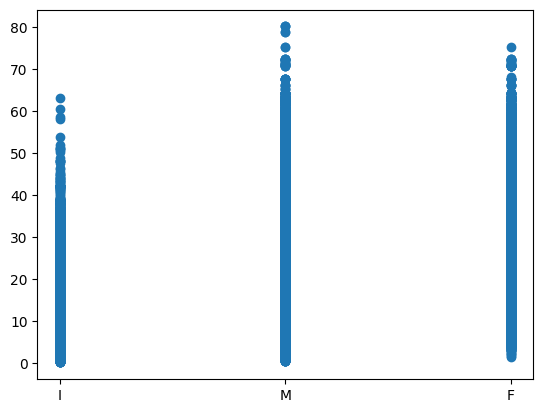

In [6]:
plt.scatter(df['Sex'], df['Weight'])
plt.show()

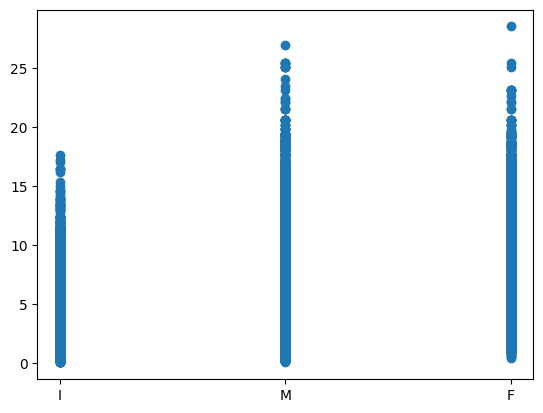

In [7]:
plt.scatter(df['Sex'], df['Shell Weight'])
plt.show()

In [8]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [9]:
gender_map = {
    'I': 1,
    'F': 2,
    'M': 3,
}

df['Sex'] = [gender_map[t] for t in df['Sex']]


In [10]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

sc = StandardScaler()
qt = QuantileTransformer()

#df[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']] = sc.fit_transform(df[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']])
df[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']] = qt.fit_transform(df[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['Age'], test_size=0.2, random_state=42)

In [12]:
X_train, y_train

(       Sex    Length  Diameter    Height    Weight  Shucked Weight  \
 20612    3  0.880380  0.634134  0.690691  0.711712        0.821201   
 2935     2  0.736236  0.682683  0.753253  0.679680        0.637638   
 73847    3  0.687187  0.656156  0.631131  0.649650        0.690691   
 46445    3  0.231732  0.250751  0.144144  0.235736        0.235736   
 66755    1  0.086587  0.075576  0.056557  0.064064        0.055055   
 ...    ...       ...       ...       ...       ...             ...   
 37194    1  0.042543  0.040040  0.073574  0.023407        0.024790   
 6265     2  0.930931  0.887387  0.989489  0.903904        0.909823   
 54886    3  0.948448  0.966466  0.852853  0.926160        0.972751   
 860      3  0.687187  0.682683  0.852853  0.868869        0.634372   
 15795    1  0.004505  0.008008  0.144144  0.006507        0.005005   
 
        Viscera Weight  Shell Weight  
 20612        0.660160      0.510844  
 2935         0.751752      0.726226  
 73847        0.642142      0

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

clf = RandomForestRegressor()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred = np.rint(y_pred)

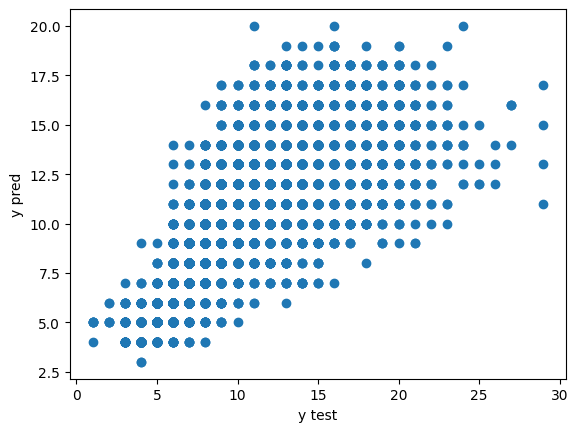

In [20]:
from sklearn import metrics

plt.scatter(y_test, y_pred)
plt.xlabel('y test')
plt.ylabel('y pred')

plt.show()

In [21]:
error = metrics.mean_absolute_percentage_error(y_test, y_pred)
score = metrics.r2_score(y_test, y_pred)

error,score

(0.14149553698967463, 0.5615224560445606)